In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
users_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Take Home Challenge 2\takehome_users.csv', encoding='latin1')
users_engagement_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Take Home Challenge 2\takehome_user_engagement.csv', encoding='latin1')

In [57]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [58]:
users_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [59]:
users_engagement_df['Week_Number'] = pd.to_datetime(users_engagement_df['time_stamp']).apply(lambda x : x.isocalendar()[1])

In [60]:
users_engagement_df['Year'] = pd.to_datetime(users_engagement_df['time_stamp']).dt.year

In [61]:
user_series = users_engagement_df.groupby(['user_id','Year','Week_Number'])['Week_Number'].count()
df = pd.DataFrame(user_series)
df = df.rename(columns={'Week_Number':'CountWeek_Number'}) 
df = df.reset_index()
df_final = df[df['CountWeek_Number']==3]


In [62]:
adopted_user = pd.DataFrame(df_final['user_id'].unique())
adopted_user = adopted_user.rename(columns={0:'adopted_user_id'})


In [63]:
dic_adopted_user = dict(zip(adopted_user['adopted_user_id'],adopted_user['adopted_user_id']))


In [64]:
users_df['adopted_user_id'] = users_df['object_id'].map(dic_adopted_user)

In [65]:
users_df['adopted_user_id'] = users_df['adopted_user_id'].fillna('N')

In [66]:
def adopted_user(var1):
    if (var1 != 'N'):
        a = 'Y'
    else: 
        a = var1
    return a    

In [67]:
users_df['adopted_user_YN'] = users_df['adopted_user_id'].apply(adopted_user)

In [68]:

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user_id               12000 non-null object
adopted_user_YN               12000 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [69]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user_id,adopted_user_YN
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,N,N
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,Y
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,N,N
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,N,N
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,N,N


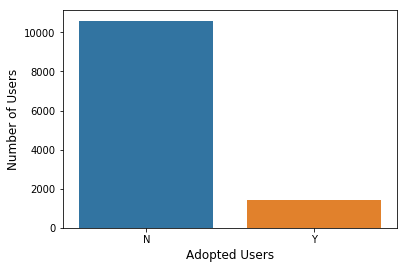

In [70]:
#plt.figure(figsize = (16,8))
sns.countplot(x='adopted_user_YN',data=users_df)
plt.xlabel('Adopted Users',fontsize = 12)
plt.ylabel('Number of Users',fontsize = 12)
#plt.title('Distribution of Orders over the week',fontsize = 14)
plt.show()

In [71]:
s = users_df.groupby(['creation_source','adopted_user_YN'])['adopted_user_YN'].count()
df = pd.DataFrame(s)
df = df.rename(columns={'adopted_user_YN':'CountWeek_adoptedusers'})
df = df.reset_index()
df

,creation_source,adopted_user_YN,CountWeek_adoptedusers
0,GUEST_INVITE,N,1852
1,GUEST_INVITE,Y,311
2,ORG_INVITE,N,3775
3,ORG_INVITE,Y,479
4,PERSONAL_PROJECTS,N,1966
5,PERSONAL_PROJECTS,Y,145
6,SIGNUP,N,1819
7,SIGNUP,Y,268
8,SIGNUP_GOOGLE_AUTH,N,1185
9,SIGNUP_GOOGLE_AUTH,Y,200


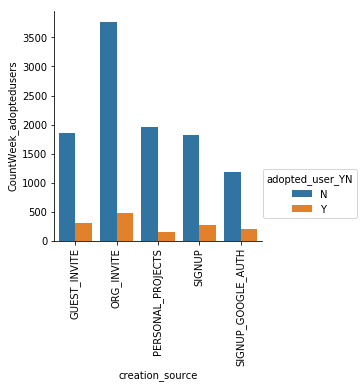

In [72]:
plt.figure(figsize = (16,8))
sns.factorplot(x='creation_source',y='CountWeek_adoptedusers',hue='adopted_user_YN',data=df,kind='bar')
plt.xticks(rotation = 90)
plt.show()

In [73]:
#df_Y = users_df[users_df['adopted_user_YN'] == 'Y']
#b = df_Y['creation_source'].value_counts()

#plt.figure(figsize = (16,8))
#sns.barplot(b.index,b.values)
#plt.xlabel('Creation Source',fontsize = 12)
#plt.ylabel('Number of Users',fontsize = 12)
#plt.title('Distribution of Creation Source for adopted users',fontsize = 14)
#plt.show()

In [84]:
users_df['adopted_user_int'] = users_df['adopted_user_YN'].apply(lambda x: 0 if x == 'N' else 1)

In [85]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user_id,adopted_user_YN,adopted_user_int
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,N,N,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,Y,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,N,N,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,N,N,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,N,N,0


In [86]:
opted_in_to_mailing_list = list(users_df['opted_in_to_mailing_list'])
enabled_for_marketing_drip = list(users_df['enabled_for_marketing_drip'])
target_list = list(users_df['adopted_user_int'])

In [87]:
np.corrcoef(opted_in_to_mailing_list, target_list)[0, 1]

0.013156285096008805

In [88]:
np.corrcoef(enabled_for_marketing_drip, target_list)[0, 1]

0.009084933477931106

In [92]:
a = pd.get_dummies(users_df['creation_source'])

In [93]:
a.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
